In [47]:
# Machine learning is a field of stuty that gives computers the ability to learn without being explicitly programmed

#Logistic Regression
#delimiter=default for csv is "," --> ' , ' special type of delimeter to allow the leaving the space around

#the missing value and detect the missing value correctly

#if the special character present in numerical datatype then the entire datatype will change hence these will not

#present.There will be blanks only and in character we can get the special character.

#replace =true it will work fast rather to assign the value and run

In [48]:
# steps for creating model in classification Algorithms:-
#1. Create a dataframe -->pd.read_csv(), pd.read_excel()

#2. preprocessing the data:-

    #a. feature selection,handling the outlier(not mendetory),but missing data treatment is mandatory(because sklearn wont 
    #allow u to create a model with missing value)
#3. Converting categorical data to numerical--> get_dummies()-->[if we have less number of data],

        #OneHotEncoder(),LabelEncoder()--> it gives number to data inaccending order.
#4. Create X and Y--> x=df.values[:,:-1]

                # y=df.values[:,-1]
#5. Scaling the data-->MinMaxScaler(), StandardScaler()

#6. Splitting the data into train and test--> train_test_split()

#7. Build the model:

    #a. Create a model object-->obj=AlgoName()
    #b. Training the model-->obj.fit(x_train,y_train)
    #c. use the model-->y_pred=obj.predict(x_test)
#8.Evaluating the model:-

#a. Confusion_matrix(y_test,y_pred)
#b. accuracy_score()
#c. classification_report()
#9. Tuning the model

    #using threshold value (0.5)

In [49]:
#Steps for any classification Algorithm

In [50]:
import pandas as pd
import numpy as np

In [51]:
#Delimiter for CSV file is delimiter = ' *, * and in order to exclude 
#the extra space which are padded around the special character ' ?' or '? '

In [52]:
#OBJECTIVE to predict the salary bucket (0  and 1) with range as <=50K and >50K 
adult_df = pd.read_csv(r'E:\Imarticus DSP 24\Python\Logistic Regression\adult_data.csv',header = None, 
                       delimiter = ' *, *',engine='python')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
pd.set_option('display.max_column',None) #to get all the variables on display board
adult_df.shape #to get no of rows and columns

(32561, 15)

In [54]:
#we have given column headings to our data frame

adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# pre-processing the DATA

In [55]:
adult_df.isnull().sum()
#there is no MV because the MV are in special characters i.e. '?'

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [56]:
adult_df = adult_df.replace(['?'], np.nan) #here we have replaced the '?' with nan

In [57]:
adult_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [58]:
#create a copy of the data frame
#adult_df_rev = pd.DataFrame.copy(adult_df) or
adult_df_rev=adult_df.copy()
#adult_df_rev.describe(include = 'all')

In [59]:
#droping few columns
adult_df_rev = adult_df_rev.drop(["education","fnlwgt"], axis = 1)

In [60]:
adult_df_rev.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [61]:
#replace the missing values with the mode vlaues of each columns, everytime the mode value will be at 0th index
for value in ['workclass', 'occupation', 'native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [62]:
adult_df_rev.workclass.mode()
#adult_df_rev.occupation.mode()

0    Private
dtype: object

In [63]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [64]:
#generic code for replacing the missing values for Numeric and Chatagorical data

"""
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64'| adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""
#revised code

"""
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)

    elif adult_df_rev[x].dtype in('int64','float64'):
        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""


"\nfor x in adult_df_rev.columns[:]:\n    if adult_df_rev[x].dtype=='object':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n\n    elif adult_df_rev[x].dtype in('int64','float64'):\n        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)\n"

In [65]:
#gives the unique level value counts for columns
adult_df_rev.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [66]:
#generic code for getting catagoricals variable and storing them in a list
colname=[]
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
        
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [67]:
#for data pre processing 
#label encoder only for catagorical variable
#fit is used to create the dictionary object in the memory and store the numeric value against each catagories
#transform will convert the original catagories from the variable to numeric values
#preprocessing is the submodule which is called from library sklearn

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])


In [68]:
adult_df_rev.head()

#0--> <=50K
#1--> >=50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [69]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [70]:
X = adult_df_rev.values[:,:-1] #store all the rows and all coumns excluding the last column
Y = adult_df_rev.values[:,-1] #store all rows and the last column

In [71]:
type(X)

numpy.ndarray

# SCALING

In [72]:
#scaling the data with - It basically helps to normalise the data within a particular range.
    #Normalization -> MinMaxScaler() --> range is 0 to 1
    #Standardization -> StandardScaler() --> range is -3 to +3 (Empirical three sigma rule)

In [73]:
#implementing standardziation here standardscaler is a function
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X=scaler.transform(X)
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [74]:
#converting Y variable into integer to avoid error of unknown label
Y=Y.astype(int)

In [75]:
#np.set_printoptions(threshold=np.inf)

# splitting the data 
"""
    1) Based on condition - used usually in case of time series
    2) based on no of observation
    3) Random Sampling --> train_test_split
"""

In [76]:
#test and train data
#1.Based on condition
#2.Based on number of obsevation[70:30] -->(not much suitable)
#3.Random sampling-->train_test_split()

In [77]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
#order of variable would be unchanged
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
#randomstate is used so that we all can get the same accuracy just like set.seed in R
print(X)
print(Y)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]
[0 0 0 ... 0 0 1]


# Model Building
creating the model object
training the model object
using the model object

In [78]:

from sklearn.linear_model import LogisticRegression

#create a model object
classifier=LogisticRegression()

#fitting training data to the model (i.e training the model)
classifier.fit(X_train, Y_train)

#using the model
Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_) #get slope values (B1,B2,B3...)
print(classifier.intercept_) #get the B0 value


[[ 0.47898827 -0.10448293  0.86285082 -0.3481469  -0.0165719  -0.18074806
   0.11569239  0.42805994  2.4277355   0.28594931  0.37942052  0.00878949]]
[-1.50131013]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test, Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

"""
                clm 0  clm1
<=50K Row 0 = [[7017  406]
>=50K Row 1 = [1316 1030]]
 
 correctly predicted for 7017 and misclassified for 406
 correctly predicted for 1030 and misclassified for 1316
 
 """

[[7017  406]
 [1316 1030]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8237281195618794


'\n                clm 0  clm1\n<=50K Row 0 = [[7017  406]\n>=50K Row 1 = [1316 1030]]\n \n correctly predicted for 7017 and misclassified for 406\n correctly predicted for 1030 and misclassified for 1316\n \n '

In [80]:
#confusion matrix:-

                    #predict -ve       predict +ve
# -ve case(0)        true negative    false positive
# +ve caase(1)       false negative   ture positive

#Accuracy_score=  TN+TP/TN+TP+FP+FN

In [81]:
#classification report:
 #             precision    recall  f1-score   support
#
 #          0       0.84      0.95      0.89      7423
  #         1       0.72      0.44      0.54      2346

#recall--> row wise calculation (actual value)
#how manny -ve cases did we catch ?
#1.class 0 (specificity) TNR= TN/TN+FP=0.95
#how many +ve cases did we catch ?
#2. class 1 (sensitivity) TPR=TP/TP+FN=0.44

#precision:- column wise calculation (prediction value)
#1. class 0:- how mayn of the -ve prediction were correct ?
        # TN/TN+FN = 0.84
    
# class 1:- how many of the +ve prediction were correct ?
        # TP/TP+FP = 0.72
    
#f1_score: 2*(precision*recall)/(prec+recall)
#if we have multiple classes then we see the f1_score(evaluation matrix because it is a combination of recall and preci)
#it is a harmonic mean of both (recall and precision) of classes

In [82]:
#SMOTE (to blance the data)
#1. UP sampling:- in this the unbalace class repeate the variable to equal.
#2.Down sampling:- 
#Type I error: negative of objective which we are looking for is called Type I error . it is fairly acceptable 
        #in industry.(False Positive)
#type II error: not acceptable in industry.(False Negative)

# Tuning the Model by Adjusting the Threshold

In [83]:
#store the predicted probabilities
#proba is used to calculate prediction on basis of threshold which we decide
#without proba it only predict or calculate on basis of default threshold(.5)
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]


In [84]:
#changing the Default Threashold from 0.5 to 0.46, in order to reduce the type 2 error and improve the type I error
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46: #the deafult 0.50 threashold is changed
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)
#basically the weightage of calss 1 have increased

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test, y_pred_class)
print(cfm)

#print("Classification report: ")
#print(classification_report(Y_test, Y_pred))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[6910  513]
 [1208 1138]]
Accuracy of the model:  0.8238304841846658
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [86]:
#generic code to get the threashold value
for a in np.arange(0,1,0.05): #range from 0 to 1 with difference of .05
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0] #type 1 error + type 2 error
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 7423  , type 2 error : 0  , type 1 error: 7423
Errors at threshold  0.05 : 5137  , type 2 error : 66  , type 1 error: 5071
Errors at threshold  0.1 : 3865  , type 2 error : 158  , type 1 error: 3707
Errors at threshold  0.15000000000000002 : 3089  , type 2 error : 272  , type 1 error: 2817
Errors at threshold  0.2 : 2526  , type 2 error : 438  , type 1 error: 2088
Errors at threshold  0.25 : 2172  , type 2 error : 610  , type 1 error: 1562
Errors at threshold  0.30000000000000004 : 1956  , type 2 error : 765  , type 1 error: 1191
Errors at threshold  0.35000000000000003 : 1846  , type 2 error : 938  , type 1 error: 908
Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.45 : 1734  , type 2 error : 1189  , type 1 error: 545
Errors at threshold  0.5 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at threshold  0.55 : 1731  , type 2 error : 1417  , type 1 error: 314
Errors at threshold  0.6000000000000001 

# ROC and AUC

In [87]:
#generic code to get AUC value
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)
print(z)

0.7079857322331378
[0.         0.06910952 1.        ]
[0.         0.48508099 1.        ]
[2 1 0]


In [88]:
#Range for AUC
#0.5-6--> poor model
#0.6-0.7--> bad model
#0.7-0.8-->good
#0.8-0.9-->very good
#0.9-1.0--> Excellent

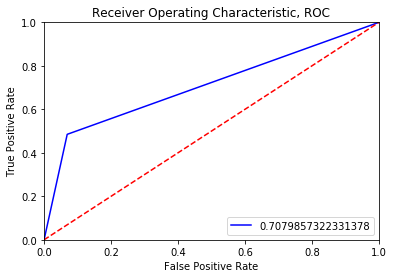

In [89]:
#AUC curve when the threshold is 0.46
import matplotlib.pyplot as plt
##to get the plot in line
%matplotlib inline  
plt.title('Receiver Operating Characteristic, ROC')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #r-- to get red colour line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [90]:
#generic code to get AUC value
#by replacing the y_pred_class to y_pred_prob
#working on combination of threshold (z)

from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)
#print(z)

0.8510128825880344
[0.         0.         0.         ... 0.99555436 0.99582379 1.        ]
[0.00000000e+00 8.52514919e-04 2.55754476e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


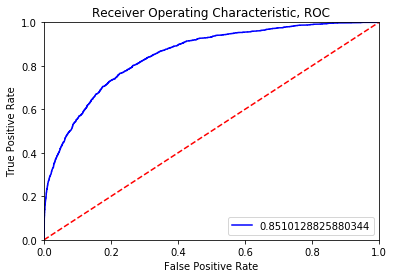

In [91]:
#AUC curve when there are various different threshold value
import matplotlib.pyplot as plt
##to get the plot in line
%matplotlib inline  
plt.title('Receiver Operating Characteristic, ROC')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #r-- to get red colour line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [92]:
#classifier.predict_proba(test) -->as our threshold is 0.46 and not the default 0.50
#(y_act,y_pred)

# Using cross validation

In [93]:
#Generic code for Using cross validation
#use it only when it is required

classifier=(LogisticRegression()) #algorithm name

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10) #here value of k=10 which is 10 fold
print(kfold_cv)

from sklearn.model_selection import cross_val_score #perform the iteration
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train, y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean to compare the mean value with the base model accuracy
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.81842105 0.81403509 0.81790259 0.85037297 0.82974989 0.82492321
 0.80824923 0.8174638  0.83106626 0.82843352]
0.8240617614681722


In [94]:
# comparing the mean value with the base model accuracy
#Create model with cross validation.

for train_value, test_value in kfold_cv.split(X_train): #split the train data in 10 folds
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

#our org test data is implemented in the model
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [95]:
#Y_pred--. crossvalidation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test, Y_pred)
print(cfm)

#print("Classification report: ")
#print(classification_report(Y_test, Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, Y_pred))

[[7016  407]
 [1315 1031]]
Accuracy of the model:  0.8237281195618794
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



# Variable selection technique

In [96]:
colname=adult_df_rev.columns[:]

#recursive feature elemination (RFE) will drop less important varaibles
from sklearn.feature_selection import RFE
rfe = RFE(classifier, 12)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Y_pred=model_rfe.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

Num Features:  12
Selected Features: 
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test, Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, Y_pred))

[[7017  406]
 [1316 1030]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8237281195618794
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [98]:
#generic code to specify the importnant varaible which need not n=to be eliminate

"""new_data=adult_df_rev[['age','workclass','occupation','race','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""

"new_data=adult_df_rev[['age','workclass','occupation','race','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

# Feature selection using Univariate selection technique

In [99]:
#we have to create X and Y again
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=10)
fit1 = test.fit(X, Y)

print(fit1.scores_) #will give chai 2 values for every X variables with related to Y
print(list(zip(colname,fit1.get_support()))) #will print the selected and non selected column names
X = fit1.transform(X)

print(X)

[8.60061182e+03 9.35436386e-02 2.40142178e+03 1.12346982e+03
 1.00356439e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.74341889e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
[[   39    13     4 ...  2174     0    40]
 [   50    13     2 ...     0     0    13]
 [   38     9     0 ...     0     0    40]
 ...
 [   58     9     6 ...     0     0    40]
 [   22     9     4 ...     0     0    20]
 [   52     9     2 ... 15024     0    40]]


In [100]:
#Repeating the above code again
#implementing standardziation here standardscaler is a function
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X) #pass some real data to the created object for learning (training)
X=scaler.transform(X) #transform the data on the basis of knowledge that the scaler/model have gain to scaled X


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [101]:
from sklearn.model_selection import train_test_split

#Split the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
#randomstate is used so that we all can get the same accuracy just like set.seed in R


In [102]:
from sklearn.linear_model import LogisticRegression

#create a model object
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_) #get slope values (B1,B2,B3...)
print(classifier.intercept_) #get the B0 value

[[ 0.47398069  0.86185407 -0.34891618 -0.0154889  -0.17867913  0.11048446
   0.41874145  2.42840713  0.28697785  0.37157867]]
[-1.49444986]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test, Y_pred)
print(cfm)

#print("Classification report: ")
#print(classification_report(Y_test, Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, Y_pred))

[[7018  405]
 [1318 1028]]
Accuracy of the model:  0.8236257549390931
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



# Variance based selection

In [104]:
#we have to create X and Y again
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.3) #default threshold (absolute no variance then drop the variable)
fit1 = vt.fit(X, Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features)
print(features.shape[1]) #total variables left
print(list(zip(colname,fit1.get_support()))) #to get the varaibles eleminated details

[1.86055686e+02 1.22584081e+00 6.61868663e+00 2.26863420e+00
 1.57819202e+01 2.58163360e+00 7.20448827e-01 2.21369502e-01
 5.45408641e+07 1.62371951e+05 1.52454313e+02 3.66745732e+01]
[[39  6 13 ...  0 40 38]
 [50  5 13 ...  0 13 38]
 [38  3  9 ...  0 40 38]
 ...
 [58  3  9 ...  0 40 38]
 [22  3  9 ...  0 20 38]
 [52  4  9 ...  0 40 38]]
11
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


In [57]:
#again similar to univariate feature selection step we have to scale & split the data, then build a model